In [34]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from urllib.parse import urlparse
import math
import json
import langid
from sklearn.feature_extraction.text import TfidfVectorizer as tfidf
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import BernoulliNB
from sklearn.linear_model import SGDClassifier
from sklearn.preprocessing import label_binarize
from sklearn.metrics import precision_score as precision
from sklearn.metrics import recall_score as recall
from sklearn.metrics import f1_score
from sklearn.metrics import confusion_matrix as cm
from sklearn.model_selection import cross_validate as cv
from sklearn.model_selection import RandomizedSearchCV as rs
from sklearn.decomposition import PCA
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

In [35]:
data = pd.read_csv('1000_labeled_and_features.csv')

In [36]:
data.columns

Index(['appId', 'true label', 'category', 'id', 'title', 'summary', 'icon',
       'price', 'free', 'minInstalls', 'maxInstalls', 'score', 'reviews',
       'developer', 'developerId', 'developerEmail', 'developerWebsite',
       'updated', 'version', 'genre', 'genreId', 'familyGenre',
       'familyGenreId', 'size', 'description', 'descriptionHTML', 'histogram',
       'offersIAP', 'adSupported', 'androidVersionText', 'androidVersion',
       'contentRating', 'screenshots', 'video', 'comments', 'recentChanges',
       'preregister', 'url', 'appId.1', 'similar', 'permissions', 'time',
       'lastseen', 'discontinued', 'installs', 'scoreText', 'ratings',
       'currency', 'priceText', 'developerAddress', 'privacyPolicy',
       'headerImage', 'videoImage', 'contentRatingDescription', 'released'],
      dtype='object')

In [37]:
data = data.head(1091)

In [38]:
data = data.drop(['id', 'price', 'free', 'minInstalls', 'maxInstalls', 'developer', 'developerId', 'developerEmail', 'genreId', 
'familyGenre', 'familyGenreId', 'size', 'histogram', 'offersIAP', 'adSupported', 'androidVersionText','preregister', 
'time', 'lastseen', 'currency', 'priceText', 'developerAddress', 'contentRatingDescription', 'released',
'updated', 'version', 'descriptionHTML', 'video', 'installs', 'scoreText', 'ratings', 'videoImage', 'appId.1', 
'androidVersion'], axis =1)
           

In [39]:
data.head()

,appId,true label,category,title,summary,icon,score,reviews,developerWebsite,genre,...,contentRating,screenshots,comments,recentChanges,url,similar,permissions,discontinued,privacyPolicy,headerImage
0,a2ndappwhats.sdkw.com,surveillance:social-media,surveillance,2nd Account for Whatsapp,2 Whatsapps on Same Device | Same Whatsapps on...,//lh3.googleusercontent.com/nCOacYEXACIuhJWb9J...,4.0,6939.0,http://jh-jewelry.in/sureshkheni.html,Communication,...,Teen,"[""//lh3.googleusercontent.com/e32FVC6gtcvUj1B1...","[""Very good applications but not suppose to al...","[""Bug Fixes""]",https://play.google.com/store/apps/details?id=...,"[""com.lbe.parallel.intl"", ""com.app.tiki.multim...","[""read the contents of your USB storage"", ""mod...",20171111:1135,NaN,NaN
1,air.au.com.metro.DumbWaysToDie2,none:misc,none,Dumb Ways to Die 2: The Games,A new set of dumb characters are here to take ...,//lh3.googleusercontent.com/-ckfFIgLg_qkKbVVgv...,4.2,1584158.0,http://dumbwaystodie.com,Casual,...,Teen,"[""//lh3.googleusercontent.com/G_-nQwn58EEoZbof...","[""It's a good game, and there's variety, but t...","[""AMERICALAND"", ""We\u2019re celebrating the Fo...",https://play.google.com/store/apps/details?id=...,"[""com.popreach.dumbways"", ""com.zynga.looney"", ...","[""find accounts on the device"", ""read the cont...",NaN,NaN,NaN
2,air.com.applauz.timeoutkids,control:use-limitation,control,Time Out - Behaviour Meter,Live Behaviour Meter companion app for &quot;T...,https://lh3.googleusercontent.com/uRLr8icEKEhV...,4.5,0.0,http://www.applauz-media.com/timeout,Parenting,...,Everyone,"[""https://lh3.googleusercontent.com/Fon1L3syRL...",[],NaN,https://play.google.com/store/apps/details?id=...,"[""com.jeesmon.malayalambible"", ""com.bn.speacki...","[""full network access""]",NaN,http://applauz-media.com/privacypolicy,https://lh3.googleusercontent.com/3_G29zRlpVOA...
3,ajx.com.calltracker,callerid:misc,callerid,Call Tracker,Call Tracker helps you identify numbers real-t...,//lh3.googleusercontent.com/RQi_G-l3CadNwi4PNc...,3.9,71.0,http://www.optcrm.com/privacypolicy.html,Tools,...,Everyone,"[""//lh3.googleusercontent.com/kIVoX7kgHvKld7LP...","[""Thanks"", ""Chutiya App and which people has c...","[""Improved search result""]",https://play.google.com/store/apps/details?id=...,"[""com.truecaller"", ""com.caller.id.location.gps...","[""read your contacts"", ""modify your contacts"",...",NaN,NaN,NaN
4,allcall.location.tracker,callerid:location,callerid,All Call Location Tracker,All Calls Location Tracker shows the location ...,//lh4.ggpht.com/GJHw8FTW0PqpDnLoHDJvg1MIQHZwjV...,4.0,3406.0,NaN,Communication,...,Everyone,"[""//lh3.googleusercontent.com/UZ80Bvz4FwbnfU4I...","[""Very Slow and looks like a spam :-("", ""Too m...",[],https://play.google.com/store/apps/details?id=...,"[""com.caller.id.location.gps.maps.phone.number...","[""read sensitive log data"", ""read your Web boo...",20171214:1228,NaN,NaN


In [40]:
data['discontinued'] = data['discontinued'].notnull().astype('int')
data['privacyPolicy'] = data['privacyPolicy'].notnull().astype('int')

In [41]:
data.columns

Index(['appId', 'true label', 'category', 'title', 'summary', 'icon', 'score',
       'reviews', 'developerWebsite', 'genre', 'description', 'contentRating',
       'screenshots', 'comments', 'recentChanges', 'url', 'similar',
       'permissions', 'discontinued', 'privacyPolicy', 'headerImage'],
      dtype='object')

In [42]:
discontinued = pd.get_dummies(data['discontinued'])
privacy = pd.get_dummies(data['privacyPolicy'])

In [43]:
privacy.columns = ['not_privacy', 'privacy']
discontinued.columns = ['not_discontinued', 'discontinued']

In [44]:
discontinued.head()

,not_discontinued,discontinued
0,0,1
1,1,0
2,1,0
3,1,0
4,0,1


In [45]:
data = data.drop(['discontinued', 'privacyPolicy'], axis  = 1)

In [46]:
data = pd.concat([data, privacy, discontinued], axis = 1)

In [47]:
data.columns

Index(['appId', 'true label', 'category', 'title', 'summary', 'icon', 'score',
       'reviews', 'developerWebsite', 'genre', 'description', 'contentRating',
       'screenshots', 'comments', 'recentChanges', 'url', 'similar',
       'permissions', 'headerImage', 'not_privacy', 'privacy',
       'not_discontinued', 'discontinued'],
      dtype='object')

In [48]:
labels = data[['true label', 'category']]

In [49]:
labels.head()

,true label,category
0,surveillance:social-media,surveillance
1,none:misc,none
2,control:use-limitation,control
3,callerid:misc,callerid
4,callerid:location,callerid


In [50]:
data = data.drop(['true label', 'category'], axis = 1)

In [51]:
data = data.fillna(0)

In [52]:
data.head()

,appId,title,summary,icon,score,reviews,developerWebsite,genre,description,contentRating,...,comments,recentChanges,url,similar,permissions,headerImage,not_privacy,privacy,not_discontinued,discontinued
0,a2ndappwhats.sdkw.com,2nd Account for Whatsapp,2 Whatsapps on Same Device | Same Whatsapps on...,//lh3.googleusercontent.com/nCOacYEXACIuhJWb9J...,4.0,6939.0,http://jh-jewelry.in/sureshkheni.html,Communication,use & Control another WhatsApp with the same d...,Teen,...,"[""Very good applications but not suppose to al...","[""Bug Fixes""]",https://play.google.com/store/apps/details?id=...,"[""com.lbe.parallel.intl"", ""com.app.tiki.multim...","[""read the contents of your USB storage"", ""mod...",0,1,0,0,1
1,air.au.com.metro.DumbWaysToDie2,Dumb Ways to Die 2: The Games,A new set of dumb characters are here to take ...,//lh3.googleusercontent.com/-ckfFIgLg_qkKbVVgv...,4.2,1584158.0,http://dumbwaystodie.com,Casual,There’s a whole new set of dumb characters tha...,Teen,...,"[""It's a good game, and there's variety, but t...","[""AMERICALAND"", ""We\u2019re celebrating the Fo...",https://play.google.com/store/apps/details?id=...,"[""com.popreach.dumbways"", ""com.zynga.looney"", ...","[""find accounts on the device"", ""read the cont...",0,1,0,1,0
2,air.com.applauz.timeoutkids,Time Out - Behaviour Meter,Live Behaviour Meter companion app for &quot;T...,https://lh3.googleusercontent.com/uRLr8icEKEhV...,4.5,0.0,http://www.applauz-media.com/timeout,Parenting,"You already have our app ""Time Out - Time Out ...",Everyone,...,[],0,https://play.google.com/store/apps/details?id=...,"[""com.jeesmon.malayalambible"", ""com.bn.speacki...","[""full network access""]",https://lh3.googleusercontent.com/3_G29zRlpVOA...,0,1,1,0
3,ajx.com.calltracker,Call Tracker,Call Tracker helps you identify numbers real-t...,//lh3.googleusercontent.com/RQi_G-l3CadNwi4PNc...,3.9,71.0,http://www.optcrm.com/privacypolicy.html,Tools,Call Tracker caller ID helps you identify numb...,Everyone,...,"[""Thanks"", ""Chutiya App and which people has c...","[""Improved search result""]",https://play.google.com/store/apps/details?id=...,"[""com.truecaller"", ""com.caller.id.location.gps...","[""read your contacts"", ""modify your contacts"",...",0,1,0,1,0
4,allcall.location.tracker,All Call Location Tracker,All Calls Location Tracker shows the location ...,//lh4.ggpht.com/GJHw8FTW0PqpDnLoHDJvg1MIQHZwjV...,4.0,3406.0,0,Communication,All Calls Location Tracker shows the location ...,Everyone,...,"[""Very Slow and looks like a spam :-("", ""Too m...",[],https://play.google.com/store/apps/details?id=...,"[""com.caller.id.location.gps.maps.phone.number...","[""read sensitive log data"", ""read your Web boo...",0,1,0,0,1


In [53]:
data.columns

Index(['appId', 'title', 'summary', 'icon', 'score', 'reviews',
       'developerWebsite', 'genre', 'description', 'contentRating',
       'screenshots', 'comments', 'recentChanges', 'url', 'similar',
       'permissions', 'headerImage', 'not_privacy', 'privacy',
       'not_discontinued', 'discontinued'],
      dtype='object')

In [54]:
text = []
for el in data.values:
    all_string = el[1] + ' ' + el[2] + ' ' + el[7] + ' ' + el[8]
    if type(el[11]) == type('a'):
        try:
            for comment in json.loads(el[11]):
                all_string += ' ' + comment
        except:
            all_string += ' ' + el[11]
    text.append(all_string.encode('utf-8'))

In [55]:
data = data.drop(['title', 'summary', 'description', 'contentRating', 'comments', 'recentChanges', 'permissions'], axis = 1)

In [56]:
text = pd.DataFrame(text, columns = ['text'])

In [57]:
data = pd.concat([data, text], axis = 1)

In [58]:
data = data.drop(['icon', 'reviews', 'developerWebsite', 'genre', 
                  'screenshots', 'url', 'similar', 'headerImage', 'score', 
                  'not_privacy', 'privacy', 'not_discontinued', 'discontinued'], axis = 1)

In [59]:
data = pd.concat([data, labels], axis = 1)

In [60]:
data.head()

,appId,text,true label,category
0,a2ndappwhats.sdkw.com,"b""2nd Account for Whatsapp 2 Whatsapps on Same...",surveillance:social-media,surveillance
1,air.au.com.metro.DumbWaysToDie2,"b""Dumb Ways to Die 2: The Games A new set of d...",none:misc,none
2,air.com.applauz.timeoutkids,b'Time Out - Behaviour Meter Live Behaviour Me...,control:use-limitation,control
3,ajx.com.calltracker,"b""Call Tracker Call Tracker helps you identify...",callerid:misc,callerid
4,allcall.location.tracker,"b""All Call Location Tracker All Calls Location...",callerid:location,callerid


In [61]:
data.to_csv('/Users/nissani/Desktop/IPV/concatenated_text.csv')

In [62]:
train_data, test_data = train_test_split(data, test_size = .25, 
                                         random_state = 28, 
                                         stratify = list(data['category']))

In [63]:
train_text = train_data['text']
test_text = test_data['text']

In [64]:
stopwords = ["a", "about", "across", "after", "afterwards", "again", "all", 
             "almost", "alone", "along", "already", "also","although","always","am","among", "amongst",
             "amoungst", "amount",  "an", "and", "another", "any","anyhow","anyone","anything","anyway",
             "anywhere", "are", "around", "as",  "at", "back","be","became", "because","become","becomes", 
             "becoming", "been", "before", "beforehand", "behind", "being", "beside", "besides", 
             "between", "beyond", "bill", "both", "but", "by", "call", "can", "cannot", "cant", 
             "co", "con", "could", "couldnt", "cry", "de", "describe", "detail", "do", "done",
             "due", "during", "each", "eg", "eight", "either", "eleven","else", "elsewhere", 
             "enough", "etc", "even", "ever", "every", "everyone", "everything", "everywhere", "except", 
             "few", "fifteen", "fify", "fill", "find", "fire", "first", "five", "for", "former", "formerly", 
             "forty", "found", "four", "from", "further", "get", "give", "go", "had", "has", 
             "hasnt", "have", "he", "hence", "her", "here", "hereafter", "hereby", "herein", "hereupon", "hers", 
             "herself", "him", "himself", "his", "how", "however", "hundred", "ie", "if", "in", "inc", "indeed", 
             "interest", "into", "is", "it", "its", "itself", "keep", "last", "latter", "latterly", "least", "less",
             "ltd", "made", "many", "may", "me", "meanwhile", "might", "mill", "mine", "more", "moreover", "most", 
             "mostly", "move", "much", "must", "my", "myself", "name", "namely", "neither", "never", "nevertheless", 
             "next", "nine", "no", "nobody", "none", "noone", "nor", "not", "nothing", "now", "nowhere", "of", "off", 
             "often", "on", "once", "one", "only", "onto", "or", "other", "others", "otherwise", "our", "ours", "ourselves",
             "out", "over", "own","part", "per", "perhaps", "please", "put", "rather", "re", "same", "see", "seem", "seemed",
             "seeming", "seems", "serious", "several", "she", "should", "show", "side", "since", "sincere", "six", "sixty", 
             "so", "some", "somehow", "someone", "something", "sometime", "sometimes", "somewhere", "still", "such", "system",
             "take", "ten", "than", "that", "the", "their", "them", "themselves", "then", "thence", "there", "thereafter", 
             "thereby", "therefore", "therein", "thereupon", "these", "they", "thick", "thin", "third", "this", "those",
             "though", "three", "through", "throughout", "thru", "thus", "to", "together", "too", "toward", "towards",
             "twelve", "twenty", "two", "un", "until", "upon", "us", "very", "via", "was", "we", "well", 
             "were", "what", "whatever", "when", "whence", "whenever", "where", "whereafter", "whereas", "whereby", "wherein",
             "whereupon", "wherever", "whether", "which", "while", "whither", "who", "whoever", "whole", "whom", "whose", 
             "why", "will", "with", "within", "without", "would", "yet", "you", "your", "yours", "yourself", "yourselves", 
             "the"]



In [31]:
tfidf = tfidf(stop_words = stopwords, min_df = 5)

In [32]:
vocabulary = tfidf.fit(train_text.values)

In [33]:
train_text_matrix = vocabulary.transform(train_text.values)

In [34]:
train_text_matrix = train_text_matrix.toarray()

In [35]:
train_text_matrix[0]

array([0., 0., 0., ..., 0., 0., 0.])

In [36]:
selectK = SelectKBest(chi2, k = 500)
selectK.fit(train_text_matrix, train_data['category'])

SelectKBest(k=500, score_func=<function chi2 at 0x11995c950>)

In [37]:
np.array(vocabulary.get_feature_names())[selectK.get_support(indices = True)]

array(['2018', '246', '3d', 'abroad', 'accidentally', 'action', 'address',
       'adventure', 'against', 'alarm', 'anonymous', 'anti', 'antivirus',
       'application', 'applications', 'applock', 'apps', 'area',
       'artists', 'attack', 'attacks', 'attempts', 'aur', 'author',
       'automatic', 'awkward', 'backup', 'bass', 'battle', 'begin',
       'beginners', 'bike', 'bikes', 'bills', 'blacklist', 'blocker',
       'bomb', 'bookmarks', 'books', 'boost', 'break', 'brightness',
       'brought', 'bug', 'calculator', 'caller', 'callers', 'calling',
       'calls', 'camera', 'cameras', 'canada', 'captured', 'cards',
       'cars', 'casual', 'catch', 'categories', 'cdma', 'cell',
       'challenge', 'challenges', 'changer', 'cheap', 'cheat', 'cheaters',
       'cheating', 'checker', 'checks', 'child', 'children', 'chosen',
       'cities', 'city', 'clash', 'code', 'codes', 'coding', 'color',
       'companion', 'consumed', 'contents', 'conversation',
       'conversations', 'countri

In [38]:
bestK_train = selectK.transform(train_text_matrix)

In [39]:
test_text_matrix = vocabulary.transform(test_text.values)

In [40]:
test_text_matrix = test_text_matrix.toarray()
bestK_test = selectK.transform(test_text_matrix)

In [41]:
tfidf_test = pd.DataFrame(bestK_test)
tfidf_train = pd.DataFrame(bestK_train)

In [42]:
train_data = train_data.reset_index()
test_data = test_data.reset_index()

In [43]:
train_data = pd.concat([train_data, tfidf_train], axis = 1)
test_data = pd.concat([test_data, tfidf_test], axis = 1)

In [44]:
train_data.head()

,index,appId,text,true label,category,0,1,2,3,4,...,490,491,492,493,494,495,496,497,498,499
0,292,com.fmee.fmeeserv,b'GPS Tracker By FollowMee Locate and Track Yo...,surveillance:location,surveillance,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.193906,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,688,com.skibapps.messagespyremover,"b'Message Spy Remover (Anti Spy) Detect, Ident...",defense:anti-surveillance,defense,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,12,appinventor.ai_oscar_rdzmty7.UnlockPhonePlus_copy,"b""Unlock Phone ( Unlock Codes ) Unlock your ce...",tutorial:settings,tutorial,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,236,com.djit.equalizerplusforandroidfree,"b""Equalizer music player booster The best musi...",none:misc,none,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,290,com.flexsolution.fakecallsms,b'Fake Call & SMS Make prank call or SMS and t...,spoof:burner-phone,spoof,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [45]:
train_labels = train_data['category'].values
test_labels = test_data['category'].values
train_data = train_data.drop(['text', 'true label', 'category', 'index'], axis = 1)
test_data = test_data.drop(['text', 'true label', 'category', 'index'], axis = 1)

In [46]:
train_data.head()

,appId,0,1,2,3,4,5,6,7,8,...,490,491,492,493,494,495,496,497,498,499
0,com.fmee.fmeeserv,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,...,0.0,0.0,0.193906,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,com.skibapps.messagespyremover,0.0,0.0,0.0,0.0,0.0,0.0,0.031829,0.0,0.0,...,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,appinventor.ai_oscar_rdzmty7.UnlockPhonePlus_copy,0.0,0.0,0.0,0.0,0.0,0.0,0.036107,0.0,0.0,...,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,com.djit.equalizerplusforandroidfree,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,...,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,com.flexsolution.fakecallsms,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,...,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [47]:
train_data = train_data.drop(['appId'], axis = 1).values
test_data = test_data.drop(['appId'], axis = 1).values

In [48]:
lr = LogisticRegression()
lr.fit(train_data, train_labels)

/usr/local/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/usr/local/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [49]:
lr.score(test_data, test_labels)

0.717948717948718

In [50]:
lr.score(train_data, train_labels)

0.7652811735941321

In [51]:
predictions = lr.predict(test_data)

In [52]:
precision(test_labels, predictions, average = 'macro')

/usr/local/lib/python3.7/site-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


0.6888515519568151

In [53]:
recall(test_labels, predictions, average = 'macro')

0.3802258751415143

In [54]:
f1_score(test_labels, predictions, average = 'macro')

/usr/local/lib/python3.7/site-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


0.437871025105554

In [55]:
unique_labels = list(set(test_labels))

In [56]:
random_forest = RandomForestClassifier()
random_forest.fit(train_data, train_labels)
random_forest.score(test_data, test_labels)

/usr/local/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


0.7582417582417582

In [57]:
random_pred = random_forest.predict(test_data)
print(precision(test_labels, random_pred, average = 'macro'))
print(recall(test_labels, random_pred, average = 'macro'))
print(f1_score(test_labels, random_pred, average = 'macro'))

0.622138351844234
0.4705437193853806
0.5182318595380621


/usr/local/lib/python3.7/site-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/usr/local/lib/python3.7/site-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [58]:
rf = SGDClassifier(learning_rate = 'optimal', early_stopping = True, penalty = 'l2', loss = 'log')
rf.fit(train_data, train_labels)
rf.score(test_data, test_labels)

0.7802197802197802

In [59]:
rf_predictions = rf.predict(test_data)

In [60]:
precision(test_labels, rf_predictions, average = 'macro')

/usr/local/lib/python3.7/site-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


0.6247682406295852

In [61]:
recall(test_labels, rf_predictions, average = 'macro')

0.5142662627948158

In [62]:
f1_score(test_labels, rf_predictions, average = 'macro')

/usr/local/lib/python3.7/site-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


0.5433556652248973

In [63]:
cm(test_labels, rf_predictions, labels = unique_labels)

array([[ 11,   0,   0,   5,   0,   1,   0,   0,   1,   3],
       [  0,   4,   0,   1,   0,   0,   1,   0,   0,   3],
       [  0,   0,   0,   1,   0,   0,   0,   0,   1,   0],
       [  1,   0,   0,  38,   0,   1,   0,   0,   1,   5],
       [  2,   0,   0,   0,   3,   0,   0,   0,   0,   5],
       [  0,   0,   0,   2,   0,   7,   0,   0,   0,   2],
       [  0,   0,   0,   1,   0,   0,  14,   0,   0,   1],
       [  0,   1,   0,   0,   0,   0,   0,   0,   1,   1],
       [  0,   0,   0,   3,   0,   0,   1,   0,  13,   4],
       [  3,   0,   0,   6,   0,   1,   0,   0,   1, 123]])

In [64]:
unique_labels

['info-extraction',
 'harassment',
 'control',
 'none',
 'callerid',
 'tutorial',
 'spoof',
 'evasion',
 'defense',
 'surveillance']

## Model Selection

In [65]:
data.head()

,appId,text,true label,category
0,a2ndappwhats.sdkw.com,"b""2nd Account for Whatsapp 2 Whatsapps on Same...",surveillance:social-media,surveillance
1,air.au.com.metro.DumbWaysToDie2,"b""Dumb Ways to Die 2: The Games A new set of d...",none:misc,none
2,air.com.applauz.timeoutkids,b'Time Out - Behaviour Meter Live Behaviour Me...,control:use-limitation,control
3,ajx.com.calltracker,"b""Call Tracker Call Tracker helps you identify...",callerid:misc,callerid
4,allcall.location.tracker,"b""All Call Location Tracker All Calls Location...",callerid:location,callerid


In [66]:
jaco = tfidf(stop_words = stopwords, min_df = 5)
vocabulary = jaco.fit(data.text.values)
all_labeled_data = vocabulary.transform(data.text.values)
all_labeled_data = all_labeled_data.toarray()

In [67]:
selectK = SelectKBest(chi2, k = 500)
selectK.fit(all_labeled_data, data.category)
bestK_all = selectK.transform(all_labeled_data)
pca = PCA(n_components = 'mle', whiten = True, svd_solver = 'full')
pca.fit(bestK_all)
pca_all = pca.transform(bestK_all)

In [68]:
data = pd.concat([data, pd.DataFrame(pca_all)], axis = 1)

In [69]:
workable_data = data.drop(['appId', 'text', 'true label', 'category'], axis = 1)
#workable_labels = label_binarize(data.category.values, classes = list(set(data.category.values)))
workable_labels = data.category.values

In [70]:
workable_data

,0,1,2,3,4,5,6,7,8,9,...,489,490,491,492,493,494,495,496,497,498
0,-0.702403,-0.013170,-1.351355,1.020158,2.210695,0.045997,0.289980,-0.222339,-0.352203,-0.488136,...,-0.029044,0.140987,1.730031,-0.717379,0.377815,-0.218129,0.892528,0.989371,0.053714,0.180903
1,-0.826029,-0.974637,-0.189904,-0.146395,-1.094100,2.427956,0.349108,-0.197016,0.061003,0.105162,...,0.051639,3.319325,1.551104,-0.222941,-1.031423,-2.209566,-0.250071,0.146102,-0.830432,0.098592
2,-0.476117,-0.501983,-0.217438,-0.362357,-0.219918,-0.484866,0.170534,-0.725774,0.129992,-0.453286,...,-0.020698,-0.324608,0.079795,0.417177,-0.186653,-0.317758,0.485150,-0.109918,0.033863,0.227624
3,0.747579,-0.635917,1.241295,1.993982,-0.074404,0.258497,0.592406,-0.289052,0.168251,0.427020,...,-0.425907,-0.895080,-1.106635,0.308248,-1.342241,-0.133334,0.337098,-0.054704,0.011807,-1.071221
4,1.597835,-1.180056,1.527300,1.813605,0.259926,0.012771,-0.068876,-0.858143,1.280338,-0.813350,...,0.662864,0.556817,0.089987,0.453047,-1.209240,0.584064,0.200158,0.400857,-0.227150,0.480551
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1086,-0.815556,0.099120,-1.891064,1.582008,2.706980,0.420885,-0.029191,-0.263599,-0.156261,-0.139537,...,-0.262259,-0.354258,0.225117,-0.009805,-0.538264,-0.030787,-0.515127,0.026546,0.308169,0.237108
1087,1.067223,-0.737374,-0.815585,-1.641721,0.076046,-0.555497,-0.726722,-0.082873,-0.481327,0.161596,...,0.304318,0.018494,0.398669,0.643649,0.893661,-0.011599,-0.197307,-0.817042,-0.313631,-1.002021
1088,-0.553370,-0.567103,-0.381798,-0.181271,-0.206374,-0.373493,-0.500659,0.034616,-0.312570,0.226828,...,-0.040601,0.295607,0.367192,0.368615,0.411981,0.721845,-0.044890,0.345387,-0.560354,-0.232894
1089,-0.078404,1.725917,1.077500,1.013148,-0.730114,-0.328502,-0.138679,0.401451,-2.601293,0.071361,...,-0.796446,-0.704450,1.230231,-1.027436,-0.095375,0.572186,2.632754,-0.763178,1.624847,-0.623059


In [71]:
lr = LogisticRegression(multi_class = 'multinomial', solver = 'lbfgs')
rf = RandomForestClassifier(random_state = 28, n_estimators = 10, max_depth = 30)
sgd = SGDClassifier(learning_rate = 'optimal', early_stopping = True, penalty = 'l2', loss = 'log')
classifiers = [lr, rf, sgd]
scores = ['f1_macro', 'precision_macro', 'recall_macro', 'accuracy']

In [72]:
for classifier in classifiers:
    cross = cv(classifier, workable_data, workable_labels, cv = 5, scoring = scores)
   
    print(cross['test_f1_macro'].mean())
    print(cross['test_recall_macro'].mean())
    print(cross['test_precision_macro'].mean())

/usr/local/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
/usr/local/lib/python3.7/site-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/usr/local/lib/python3.7/site-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/usr/local/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
/usr/local/lib/python3.7/site-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set 

0.3326539666484137
0.2953762024020408
0.5081610117452067


/usr/local/lib/python3.7/site-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/usr/local/lib/python3.7/site-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/usr/local/lib/python3.7/site-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/usr/local/lib/python3.7/site-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/usr/local/lib/python3.7/site-packages/sklearn/metrics/classification.py

0.3265694857444197
0.3086090924291859
0.3997082336330805


/usr/local/lib/python3.7/site-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/usr/local/lib/python3.7/site-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/usr/local/lib/python3.7/site-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/usr/local/lib/python3.7/site-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/usr/local/lib/python3.7/site-packages/sklearn/metrics/classification.py

0.3347667418616524
0.3012277511851454
0.4596379786659188


/usr/local/lib/python3.7/site-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/usr/local/lib/python3.7/site-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [325]:
import sklearn.metrics

sorted(sklearn.metrics.SCORERS.keys())

['accuracy',
 'adjusted_mutual_info_score',
 'adjusted_rand_score',
 'average_precision',
 'balanced_accuracy',
 'brier_score_loss',
 'completeness_score',
 'explained_variance',
 'f1',
 'f1_macro',
 'f1_micro',
 'f1_samples',
 'f1_weighted',
 'fowlkes_mallows_score',
 'homogeneity_score',
 'jaccard',
 'jaccard_macro',
 'jaccard_micro',
 'jaccard_samples',
 'jaccard_weighted',
 'max_error',
 'mutual_info_score',
 'neg_log_loss',
 'neg_mean_absolute_error',
 'neg_mean_squared_error',
 'neg_mean_squared_log_error',
 'neg_median_absolute_error',
 'normalized_mutual_info_score',
 'precision',
 'precision_macro',
 'precision_micro',
 'precision_samples',
 'precision_weighted',
 'r2',
 'recall',
 'recall_macro',
 'recall_micro',
 'recall_samples',
 'recall_weighted',
 'roc_auc',
 'v_measure_score']

## Hyperparameter Tuning

In [338]:
data = data[['appId', 'text', 'category']]

In [339]:
data.head()

,appId,text,category
0,a2ndappwhats.sdkw.com,"b""2nd Account for Whatsapp 2 Whatsapps on Same...",surveillance
1,air.au.com.metro.DumbWaysToDie2,"b""Dumb Ways to Die 2: The Games A new set of d...",none
2,air.com.applauz.timeoutkids,b'Time Out - Behaviour Meter Live Behaviour Me...,control
3,ajx.com.calltracker,"b""Call Tracker Call Tracker helps you identify...",callerid
4,allcall.location.tracker,"b""All Call Location Tracker All Calls Location...",callerid


In [340]:
hpt_data = data[['appId', 'text', 'category']]

In [347]:
hpt_data.head()

,appId,text,category
0,a2ndappwhats.sdkw.com,"b""2nd Account for Whatsapp 2 Whatsapps on Same...",surveillance
1,air.au.com.metro.DumbWaysToDie2,"b""Dumb Ways to Die 2: The Games A new set of d...",none
2,air.com.applauz.timeoutkids,b'Time Out - Behaviour Meter Live Behaviour Me...,control
3,ajx.com.calltracker,"b""Call Tracker Call Tracker helps you identify...",callerid
4,allcall.location.tracker,"b""All Call Location Tracker All Calls Location...",callerid


In [348]:
train_data, test_data = train_test_split(hpt_data, test_size = .25, 
                                         random_state = 28, 
                                         stratify = list(hpt_data['category']))

In [349]:
print(len(train_data))
print(len(test_data))

818
273


In [350]:
train_data = train_data.reset_index()
test_data = test_data.reset_index()

In [351]:
train_data.head()

,index,appId,text,category
0,292,com.fmee.fmeeserv,b'GPS Tracker By FollowMee Locate and Track Yo...,surveillance
1,688,com.skibapps.messagespyremover,"b'Message Spy Remover (Anti Spy) Detect, Ident...",defense
2,12,appinventor.ai_oscar_rdzmty7.UnlockPhonePlus_copy,"b""Unlock Phone ( Unlock Codes ) Unlock your ce...",tutorial
3,236,com.djit.equalizerplusforandroidfree,"b""Equalizer music player booster The best musi...",none
4,290,com.flexsolution.fakecallsms,b'Fake Call & SMS Make prank call or SMS and t...,spoof


In [352]:
tfidf_init = tfidf(stop_words = stopwords, min_df = 5)
vocabulary = tfidf_init.fit(train_data.text)
train_matrix = vocabulary.transform(train_data.text).toarray()
test_matrix = vocabulary.transform(test_data.text).toarray()

In [353]:
train_data = pd.concat([train_data, pd.DataFrame(train_matrix)], axis = 1)
test_data = pd.concat([test_data, pd.DataFrame(test_matrix)], axis = 1)

In [354]:
train_data.head()

,index,appId,text,category,0,1,2,3,4,5,...,3379,3380,3381,3382,3383,3384,3385,3386,3387,3388
0,292,com.fmee.fmeeserv,b'GPS Tracker By FollowMee Locate and Track Yo...,surveillance,0.0,0.0,0.0,0.021414,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,688,com.skibapps.messagespyremover,"b'Message Spy Remover (Anti Spy) Detect, Ident...",defense,0.0,0.0,0.0,0.032309,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,12,appinventor.ai_oscar_rdzmty7.UnlockPhonePlus_copy,"b""Unlock Phone ( Unlock Codes ) Unlock your ce...",tutorial,0.0,0.0,0.0,0.036652,0.040718,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,236,com.djit.equalizerplusforandroidfree,"b""Equalizer music player booster The best musi...",none,0.0,0.0,0.0,0.021145,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,290,com.flexsolution.fakecallsms,b'Fake Call & SMS Make prank call or SMS and t...,spoof,0.0,0.0,0.0,0.000000,0.054280,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [355]:
train_labels = train_data.category.values
test_labels = test_data.category.values

In [356]:
train_id = train_data.appId
test_id = test_data.appId

In [357]:
train_data = train_data.drop(['index', 'appId', 'text', 'category'], axis = 1)
test_data = test_data.drop(['index', 'appId', 'text', 'category'], axis = 1)

In [358]:
params = {
    'loss': ['hinge', 'log', 'squared_hinge', 'modified_huber'],
    'penalty': ['l1', 'l2', 'elasticnet'],
    'alpha': [.000001, .00001, .0001, .0005, .001, .005, .01, .05],
    'l1_ratio': [0, .15, .3, .45, .6, .75, .9, 1],
    'fit_intercept': [True, False],
    'learning_rate': ['constant', 'optimal', 'invscaling', 'adaptive'],
    'eta0': [.001]
}

In [359]:
len(params['loss'])*len(params['penalty'])*len(params['alpha'])*len(params['l1_ratio'])*len(params['fit_intercept'])*len(params['learning_rate'])

6144

In [360]:
sgd = SGDClassifier()

In [361]:
random_search = rs(sgd, params, n_iter = 30, scoring = 'recall_macro', cv = 3, random_state = 28)

In [362]:
random_search.fit(train_data.values, train_labels)

/usr/local/lib/python3.7/site-packages/sklearn/model_selection/_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


RandomizedSearchCV(cv=3, error_score='raise-deprecating',
                   estimator=SGDClassifier(alpha=0.0001, average=False,
                                           class_weight=None,
                                           early_stopping=False, epsilon=0.1,
                                           eta0=0.0, fit_intercept=True,
                                           l1_ratio=0.15,
                                           learning_rate='optimal',
                                           loss='hinge', max_iter=1000,
                                           n_iter_no_change=5, n_jobs=None,
                                           penalty='l2', power_t=0.5,
                                           random_state=None, shuffle=True,
                                           tol=0.001, va...
                                        'eta0': [0.001],
                                        'fit_intercept': [True, False],
                                        'l1_rati

In [363]:
best_sgd = random_search.best_estimator_

In [364]:
best_sgd.fit(train_data, train_labels)

SGDClassifier(alpha=0.0001, average=False, class_weight=None,
              early_stopping=False, epsilon=0.1, eta0=0.001, fit_intercept=True,
              l1_ratio=0.75, learning_rate='optimal', loss='hinge',
              max_iter=1000, n_iter_no_change=5, n_jobs=None, penalty='l1',
              power_t=0.5, random_state=None, shuffle=True, tol=0.001,
              validation_fraction=0.1, verbose=0, warm_start=False)

In [366]:
best_sgd.score(test_data, test_labels)

0.7948717948717948

In [368]:
sgd_predictions = best_sgd.predict(test_data)

In [370]:
precision(test_labels, sgd_predictions, average = 'macro')

/usr/local/lib/python3.7/site-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


0.6588745083517088

In [371]:
recall(test_labels, sgd_predictions, average = 'macro')

0.6346025729624042

In [372]:
f1_score(test_labels, sgd_predictions, average = 'macro')

/usr/local/lib/python3.7/site-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


0.6400802081860059

In [374]:
cm(test_labels, sgd_predictions, labels = list(set(test_labels)))

array([[  0,   0,   0,   0,   0,   0,   0,   0,   2,   0],
       [  0,   5,   0,   0,   0,   0,   3,   0,   2,   0],
       [  0,   0,   6,   0,   1,   0,   1,   0,   0,   1],
       [  0,   0,   1,  15,   1,   0,   3,   0,   0,   1],
       [  0,   0,   0,   1,  14,   0,   1,   0,   0,   0],
       [  0,   0,   1,   0,   0,   2,   0,   0,   0,   0],
       [  0,   1,   1,   1,   1,   0, 121,   1,   6,   2],
       [  0,   0,   0,   1,   0,   0,   1,   7,   0,   2],
       [  0,   0,   0,   2,   0,   0,   1,   2,  14,   2],
       [  0,   1,   1,   3,   1,   0,   4,   2,   1,  33]])

In [375]:
with open('allMktData.txt', 'r') as f:
    app_data = []
    for line in f:
        app_data.append(line.split('\t'))

In [392]:
len(app_data)

391805

In [390]:
eng_data = []
for app in app_data:
    if len(app) == 3:
        if langid.classify(app[2])[0] == 'en':
            eng_data.append(app)

In [391]:
len(eng_data)

337869

In [396]:
formatted_data = []
for app in eng_data:
    helper = []
    helper.append(app[0])
    helper.append(app[1] + ' ' + app[2])
    formatted_data.append(helper)

In [397]:
new_app_data = pd.DataFrame(formatted_data, columns = ['appId', 'text'])

In [398]:
new_app_data.head()

,appId,text
0,com.cupidmedia.wrapper.pinkcupid,PinkCupid - Lesbian Dating App PinkCupid is a ...
1,com.spencerlearning.ultimatephonics,Ultimate Phonics Reading App This app is a mus...
2,com.pocketprep.ase,ASE A-Series Pocket Prep Automobile technician...
3,com.pocketprep.ftce,FTCE Pocket Prep Pocket Prep’s FTCE® practice ...
4,com.schoolpro,School Assistant + School Assistant + is your ...


In [402]:
data.head()

,appId,text,category
0,a2ndappwhats.sdkw.com,"b""2nd Account for Whatsapp 2 Whatsapps on Same...",surveillance
1,air.au.com.metro.DumbWaysToDie2,"b""Dumb Ways to Die 2: The Games A new set of d...",none
2,air.com.applauz.timeoutkids,b'Time Out - Behaviour Meter Live Behaviour Me...,control
3,ajx.com.calltracker,"b""Call Tracker Call Tracker helps you identify...",callerid
4,allcall.location.tracker,"b""All Call Location Tracker All Calls Location...",callerid


In [403]:
tfidf_init = tfidf(stop_words = stopwords, min_df = 5)
vocabulary = tfidf_init.fit(data.text)

In [404]:
new_app_data_matrix = vocabulary.transform(new_app_data.text.values)
data_matrix = vocabulary.transform(data.text.values)

In [408]:
new_app_data = pd.concat([new_app_data, pd.DataFrame(new_app_data_matrix.toarray())], axis = 1)

In [407]:
data = pd.concat([data, pd.DataFrame(data_matrix.toarray())], axis = 1)

In [409]:
data.head()

,appId,text,category,0,1,2,3,4,5,6,...,4031,4032,4033,4034,4035,4036,4037,4038,4039,4040
0,a2ndappwhats.sdkw.com,"b""2nd Account for Whatsapp 2 Whatsapps on Same...",surveillance,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.104762,0.0,0.0,0.0,0.0,0.0
1,air.au.com.metro.DumbWaysToDie2,"b""Dumb Ways to Die 2: The Games A new set of d...",none,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0
2,air.com.applauz.timeoutkids,b'Time Out - Behaviour Meter Live Behaviour Me...,control,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0
3,ajx.com.calltracker,"b""Call Tracker Call Tracker helps you identify...",callerid,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0
4,allcall.location.tracker,"b""All Call Location Tracker All Calls Location...",callerid,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0


In [410]:
new_app_data.head()

,appId,text,0,1,2,3,4,5,6,7,...,4031,4032,4033,4034,4035,4036,4037,4038,4039,4040
0,com.cupidmedia.wrapper.pinkcupid,PinkCupid - Lesbian Dating App PinkCupid is a ...,0.0,0.000000,0.0,0.000000,0.00000,0.0,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,com.spencerlearning.ultimatephonics,Ultimate Phonics Reading App This app is a mus...,0.0,0.000000,0.0,0.006727,0.00756,0.0,0.011026,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,com.pocketprep.ase,ASE A-Series Pocket Prep Automobile technician...,0.0,0.016221,0.0,0.000000,0.00000,0.0,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,com.pocketprep.ftce,FTCE Pocket Prep Pocket Prep’s FTCE® practice ...,0.0,0.000000,0.0,0.000000,0.00000,0.0,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,com.schoolpro,School Assistant + School Assistant + is your ...,0.0,0.000000,0.0,0.000000,0.00000,0.0,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [414]:
best_sgd.fit(data.drop(['appId', 'text', 'category'], axis = 1).values, data.category.values)

SGDClassifier(alpha=0.0001, average=False, class_weight=None,
              early_stopping=False, epsilon=0.1, eta0=0.001, fit_intercept=True,
              l1_ratio=0.75, learning_rate='optimal', loss='hinge',
              max_iter=1000, n_iter_no_change=5, n_jobs=None, penalty='l1',
              power_t=0.5, random_state=None, shuffle=True, tol=0.001,
              validation_fraction=0.1, verbose=0, warm_start=False)

In [575]:
features = vocabulary.get_feature_names()

In [583]:
len(features)

4041

In [581]:
indicies = np.argsort(best_sgd.coef_)
indicies = indicies[0]
top_words = np.array(features)[indicies]

In [582]:
top_words[:100]

array(['phone', 'device', 'hated', 'changer', 'displaying', 'satellite',
       'free', 'family', 'id', 'sms', 'deleted', 'incoming', 'route',
       'tracer', 'credits', 'install', 'spoof', 'uk', 'true', 'change',
       'gps', 'locate', 'trackers', 'operating', 'hacking', 'crime',
       'manager', 'hide', 'imei', 'cellular', 'really', 'smart',
       'unlimited', 'reach', 'help', 'graphical', 'information', 'gt',
       'texts', 'lost', 'data', 'view', 'fine', 'fetch', 'used',
       'whatsapp', 'outgoing', 'needed', 'recovery', 'option', 'actual',
       'stolen', 'pranked', 'practices', 'portrait', 'prank', 'posted',
       'pre', 'pranks', 'precautions', 'port', 'precious', 'precise',
       'popups', 'portal', 'portuguese', 'position', 'practical', 'posts',
       'potential', 'potentially', 'post', 'possibly', 'possible',
       'possibility', 'practice', 'power', 'possibilities', 'positive',
       'positions', 'powerful', 'ppl', 'posting', 'português', 'powered',
       '00',

In [415]:
new_app_predictions = best_sgd.predict(new_app_data.drop(['appId', 'text'], axis = 1).values)

In [429]:
send_to_paula = pd.concat([new_app_data[['appId', 'text']], pd.DataFrame(new_app_predictions, columns = ['prediction'])], axis = 1)

In [421]:
send_to_paula = send_to_paula.sample(n=100, random_state = 28)

In [423]:
send_to_paula_no_pred = send_to_paula.drop(['prediction'], axis = 1)

In [424]:
send_to_paula.to_csv('/Users/nissani/Desktop/IPV/predicted_apps_100.csv')

In [426]:
send_to_paula_no_pred.to_csv('/Users/nissani/Desktop/IPV/predicted_apps_100_no_pred.csv')

In [428]:
data.category.value_counts()

surveillance       537
none               182
defense             84
info-extraction     83
spoof               65
tutorial            45
callerid            41
harassment          37
evasion             11
control              6
Name: category, dtype: int64

Text(0, 0.5, 'Count')

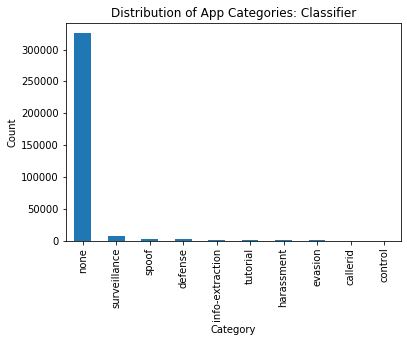

In [524]:
send_to_paula.prediction.value_counts().plot(kind = 'bar')
plt.title('Distribution of App Categories: Classifier')
plt.xlabel('Category')
plt.ylabel('Count')

In [434]:
send_to_paula.prediction.value_counts()

none               325185
surveillance         7123
spoof                2071
defense              1940
info-extraction       734
tutorial              573
harassment             96
evasion                85
callerid               48
control                14
Name: prediction, dtype: int64

Text(0, 0.5, 'Count')

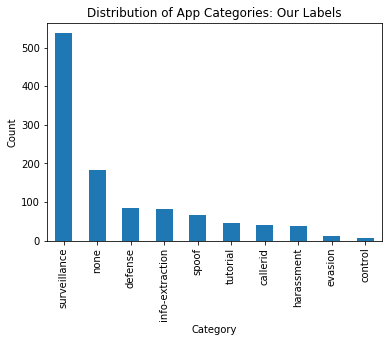

In [525]:
data.category.value_counts().plot(kind = 'bar')
plt.title('Distribution of App Categories: Our Labels')
plt.xlabel('Category')
plt.ylabel('Count')

In [436]:
data.category.value_counts()

surveillance       537
none               182
defense             84
info-extraction     83
spoof               65
tutorial            45
callerid            41
harassment          37
evasion             11
control              6
Name: category, dtype: int64

In [526]:
len(send_to_paula)

337869

In [527]:
send_to_paula[send_to_paula.prediction == 'surveillance'].sample(n = 10, random_state = 28)

,appId,text,prediction
25664,com.voicecorder.bestrecorder.audiorecorder,Voice Recorder Voice recorder is a high qualit...,surveillance
22952,com.isenet.jettingforhusqvarna,Jetting for Husqvarna 2T This app will help yo...,surveillance
28687,com.mulleadys.mybins,Mulleadys Mulleadys Wheelie Bin Customer App -...,surveillance
51492,com.cosmicpie.spacetodolist,"Kosmos - Work Time Tracker, Job Timesheet Time...",surveillance
3943,com.uattend,uAttend The uAttend mobile app is part of the ...,surveillance
120067,net.pkge.pkge,pkge.net - Package tracking The pkge.net servi...,surveillance
141580,com.voicecorder.bestrecorder.audiorecorder,Voice Recorder Voice recorder is a high qualit...,surveillance
110753,com.losasencio.Enviar_mensajes_a_dios,"Send a message to God Send messages to God, th...",surveillance
125995,com.fashionhive.punjabisms,Punjabi SMS Punjabi Sms - Find 2017 largest co...,surveillance
295164,com.aw.ec,Employee Portal Payroll Relief With the Payrol...,surveillance


In [528]:
list(set(send_to_paula.prediction))

['control',
 'callerid',
 'harassment',
 'defense',
 'spoof',
 'evasion',
 'surveillance',
 'tutorial',
 'info-extraction',
 'none']

In [545]:
send_to_paula[send_to_paula.prediction == 'callerid']

,appId,text,prediction
155,com.Gagri.BreakingIndia,Breaking India This is an important book which...,callerid
5454,com.dojoexpert.dojologin,Dojo Login If you are a student of a martial a...,callerid
11493,brychta.stepan.universe,Universe The Universe is an astounding place. ...,callerid
14988,com.Gagri.BreakingIndia,Breaking India This is an important book which...,callerid
20567,brychta.stepan.universe,Universe The Universe is an astounding place. ...,callerid
29641,brychta.stepan.universe,Universe The Universe is an astounding place. ...,callerid
30511,com.Gagri.BreakingIndia,Breaking India This is an important book which...,callerid
44789,com.liveufly.app,Cheapest flights Liveufly is a travel metasear...,callerid
46632,brychta.stepan.universe,Universe The Universe is an astounding place. ...,callerid
52455,com.liveufly.app,Cheapest flights Liveufly is a travel metasear...,callerid


In [547]:
len(send_to_paula.drop_duplicates())

80476

In [549]:
send_to_paula.drop_duplicates().prediction.value_counts()

none               79448
surveillance         642
defense              131
spoof                120
info-extraction       54
tutorial              47
harassment            13
evasion               10
callerid               9
control                2
Name: prediction, dtype: int64

In [550]:
send_to_paula = send_to_paula.drop_duplicates()

In [555]:
stratified_sample = []
for category in list(set(send_to_paula.prediction)):
    if len(send_to_paula[send_to_paula.prediction == category]) < 10:
        stratified_sample.append(send_to_paula[send_to_paula.prediction == category])
    else:
        stratified_sample.append(send_to_paula[send_to_paula.prediction == category].sample(n = 10, 
                                                                                            random_state = 28, 
                                                                                            replace = False))

In [556]:
len(stratified_sample)

10

In [557]:
paula_stratified = pd.concat(stratified_sample, axis = 0)

In [560]:
paula_stratified.to_csv('/Users/nissani/Desktop/IPV/predicted_apps_balanced_sample.csv')

In [561]:
paula_stratified.drop(['prediction'], axis = 1).to_csv('/Users/nissani/Desktop/IPV/predicted_apps_balanced_sample_no_pred.csv')

In [29]:
send_to_paula.prediction.value_counts().plot(kind = 'bar')
plt.title('Distribution of App Categories: Labeled by Classifier')
plt.xlabel('Category')
plt.ylabel('Count')

NameError: name 'send_to_paula' is not defined